In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_fwf('./wili dataset/x_train.txt', header=None)
X_train = df[[0]]
df = pd.read_fwf('./wili dataset/x_test.txt', header=None)
X_test = df[[0]] 

In [3]:
target = pd.read_fwf('./wili dataset/y_train.txt',header = None)
y_train = target[0]
target = pd.read_fwf('./wili dataset/y_test.txt',header = None)
y_test = target[0]

In [4]:
X_train.head()

,0
0,Klement Gottwaldi surnukeha palsameeriti ning ...
1,"Sebes, Joseph; Pereira Thomas (1961) (pÃ¥ eng)..."
2,à¤­à¤¾à¤°à¤¤à¥€à¤¯ à¤¸à¥�à¤µà¤¾à¤¤à¤¨à¥�à¤¤à¥�...
3,AprÃ¨s lo cort periÃ²de d'establiment a BasilÃ...
4,à¸–à¸™à¸™à¹€à¸ˆà¸£à¸´à¸�à¸�à¸£à¸¸à¸‡ (à¸­à¸±à¸...


In [5]:
X_test.head()

,0
0,Ne l fin de l seclo XIX l Japon era inda Ã§con...
1,Schiedam is gelegen tussen Rotterdam en Vlaard...
2,"Ð“IÑƒÑ€ÑƒÑ�Ð°Ð· Ð±Ð°Ñ‚Ð°Ð»ÑŒÐ¾Ð½Ð°Ð», Ð³ÑŒÐ¾Ñ€..."
3,à²°à²¾à²œà³�à²¯à²¶à²¾à²¸à³�à²¤à³�à²°à²¦ à²ªà²¿...
4,Halukum adalah kelenjar tiroid nang menonjol d...


In [6]:
y_train[y_train == 'be-tara'] = 'be-tarask'
y_train[y_train == 'roa-tar'] = 'roa-tara'
y_train.head()

0    est
1    swe
2    mai
3    oci
4    tha
Name: 0, dtype: object

In [7]:
labels = pd.read_csv('./wili dataset/labels.csv', delimiter=';')

In [8]:
labels.head()

,Label,English,Wiki Code,ISO 369-3,German,Language family,Writing system,Remarks,Synonyms
0,ace,Achinese,ace,ace,Achinesisch,Austronesian,NaN,NaN,NaN
1,afr,Afrikaans,af,afr,Afrikaans,Indo-European,NaN,NaN,NaN
2,als,Alemannic German,als,gsw,Alemannisch,Indo-European,NaN,(ursprünglich nur Elsässisch),NaN
3,amh,Amharic,am,amh,Amharisch,Afro-Asiatic,NaN,NaN,NaN
4,ang,Old English,ang,ang,Altenglisch,Indo-European,NaN,(ca. 450-1100),Angelsächsisch


### Tokenize the Labels

In [9]:
label2int = {}
counter = 0
for label in labels['Label']:
    if label not in label2int:
        label2int[label] = counter
    counter += 1

### Tokenize the  target variables

In [10]:
y_train_int = []
for label in y_train:
    y_train_int.append(label2int[label])

In [11]:
y_test_int = []
for label in y_test:
    y_test_int.append(label2int[label])

### Data Preprocessing

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
vectorizer = TfidfVectorizer(analyzer='char',min_df=25,lowercase=True, norm='l2')

In [14]:
vectorizer.fit(X_train[0])

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=25,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [15]:
X_train2int = vectorizer.transform(X_train[0]).toarray()

In [16]:
X_train2int.shape

(117500, 155)

In [17]:
X_test2int = vectorizer.transform(X_test[0]).toarray()

In [18]:
X_test2int.shape

(117500, 155)

### PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA(n_components=80)

In [21]:
pca.fit(X_train2int)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca_X_train = pca.transform(X_train2int)

In [44]:
import matplotlib.pyplot as plt

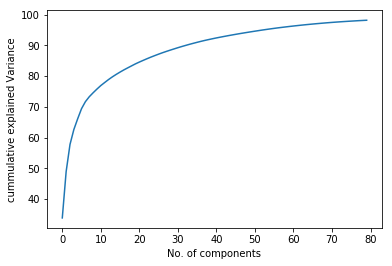

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [24]:
pca_X_test = pca.transform(X_test2int)

### SGDClassifier

In [25]:
from sklearn.linear_model import SGDClassifier

In [26]:
clf = SGDClassifier()

In [27]:
clf.fit(X_train2int, y_train_int)

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [28]:
y_pred = clf.predict(X_train2int)

In [29]:
from sklearn.metrics import classification_report, accuracy_score

In [30]:
print(classification_report(y_train_int, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.91      0.87       500
          1       0.84      0.78      0.81       500
          2       0.43      0.69      0.53       500
          3       0.99      0.98      0.99       500
          4       0.92      0.90      0.91       500
          5       0.81      0.75      0.78       500
          6       0.80      0.50      0.61       500
          7       0.74      0.80      0.77       500
          8       0.36      0.85      0.50       500
          9       0.46      0.75      0.57       500
         10       0.61      0.76      0.68       500
         11       0.98      0.86      0.92       500
         12       0.84      0.86      0.85       500
         13       0.94      0.99      0.96       500
         14       0.88      0.93      0.90       500
         15       0.82      0.37      0.51       500
         16       0.88      0.54      0.67       500
         17       0.82      0.08      0.15   

C:\Users\Jatin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
accuracy_score(y_pred, y_train_int)

0.7622978723404256

## Using ANN

#### One hot encoding target variables

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
y_train_int = np.array(y_train_int).reshape(-1, 1)
y_test_int = np.array(y_test_int).reshape(-1, 1)

In [34]:
enc = OneHotEncoder()

In [35]:
enc.fit(y_train_int)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [36]:
y_train_enc = enc.transform(y_train_int)
y_test_enc = enc.transform(y_test_int)

### Designing ANN

In [37]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\Jatin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
clf = Sequential()

In [39]:
clf.add(Dense(output_dim = 130, kernel_initializer = 'uniform', activation='relu', input_dim = 80))
clf.add(Dropout(rate=0.2))
clf.add(Dense(output_dim = 130, kernel_initializer = 'uniform', activation='relu'))
clf.add(Dropout(rate=0.3))
clf.add(Dense(output_dim = 130, kernel_initializer = 'uniform', activation='relu'))
clf.add(Dropout(rate=0.2))
clf.add(Dense(output_dim =235  , kernel_initializer = 'uniform', activation='softmax'))

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=80, units=130)`
  """Entry point for launching an IPython kernel.
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=130)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=130)`
  """
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="softmax", units=235)`
  import sys


In [40]:
clf.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [41]:
with tf.device('/gpu:0'):
    clf.fit(pca_X_train, y_train_enc, batch_size=48, epochs=10, validation_data=(pca_X_test,y_test_enc))

Train on 117500 samples, validate on 117500 samples
Epoch 1/10
117500/117500 [==============================] - 25s 210us/step - loss: 2.9933 - acc: 0.2187 - val_loss: 1.9743 - val_acc: 0.4265
Epoch 2/10
117500/117500 [==============================] - 13s 112us/step - loss: 2.0317 - acc: 0.3985 - val_loss: 1.5655 - val_acc: 0.5292
Epoch 3/10
117500/117500 [==============================] - 15s 128us/step - loss: 1.6723 - acc: 0.4957 - val_loss: 1.2570 - val_acc: 0.6277
Epoch 4/10
117500/117500 [==============================] - 15s 127us/step - loss: 1.4185 - acc: 0.5723 - val_loss: 1.0623 - val_acc: 0.6867
Epoch 5/10
117500/117500 [==============================] - 14s 119us/step - loss: 1.2579 - acc: 0.6230 - val_loss: 0.9500 - val_acc: 0.7263
Epoch 6/10
117500/117500 [==============================] - 14s 120us/step - loss: 1.1487 - acc: 0.6562 - val_loss: 0.8634 - val_acc: 0.7524
Epoch 7/10
117500/117500 [==============================] - 14s 122us/step - loss: 1.0712 - acc: 0.681